In [ ]:
import numpy as np
import time
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load in tSNE 
from sklearn.manifold import TSNE

## Open T-SNE
https://github.com/pavlin-policar/openTSNE


This package allows new points to be added to the mapping. 

Run 60000 points of MNIST to train the t-SNE and then 10000 new test points 

In [ ]:
! pip install opentsne

In [ ]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My\ Drive/Summer\ 2020/COVID-19\ Princeton/COVID-Net-master/data

/content/drive/My Drive/Summer 2020/COVID-19 Princeton/COVID-Net-master/data


In [ ]:
image_height, image_width, channels = (1024, 1024, 3)

In [ ]:
''''import numpy as np  
import tensorflow as tf


data_dir = "./train"

data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
batch_size = 32
data_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False)
data_list = []
batch_index = 0

while batch_index <= data_generator.batch_index:
    data = data_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

# now, data_array is the numeric data of whole images''''

SyntaxError: ignored

In [ ]:
''''data_dir = "./test"

data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
batch_size = 32
test_data_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False)
'''data_list = []
batch_index = 0

while batch_index <= data_generator.batch_index:
    data = data_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

# now, data_array is the numeric data of whole images
data_array = np.asarray(data_list)'''''''

Found 1579 images belonging to 1 classes.


'data_list = []\nbatch_index = 0\n\nwhile batch_index <= data_generator.batch_index:\n    data = data_generator.next()\n    data_list.append(data[0])\n    batch_index = batch_index + 1\n\n# now, data_array is the numeric data of whole images\ndata_array = np.asarray(data_list)'

In [ ]:
'''testX = data_array'''

In [ ]:
folder = "./train/images/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

Working with 13919 images
Image examples: 


In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = onlyfiles[0:500]
    
print("Files in train_files: %d" % len(train_files))

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    # Convert to Numpy Array
    x = img_to_array(img).astype(int)  
    # Normalize
    dataset[i] = x/255
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")


Using TensorFlow backend.


Files in train_files: 500
250 images to array
500 images to array
All images to array!


In [ ]:
dataset[0][0][0]

array([0.00392157, 0.00392157, 0.00392157], dtype=float32)

In [ ]:
folder = "./test/images"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

Working with 1579 images
Image examples: 


In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = onlyfiles[0:50]
    
print("Files in train_files: %d" % len(train_files))

test_dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    # Convert to Numpy Array
    x = img_to_array(img).astype(int)  
    # Normalize
    dataset[i] = x/255
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")


Files in train_files: 50
All images to array!


In [ ]:
!pwd

/content/drive/My Drive/Summer 2020/COVID-19 Princeton/COVID-Net-master/data


In [ ]:
with open("../train_COVIDx4.txt") as f:
    testfiles = f.readlines()

In [ ]:
trainy_categ = []
for i in testfiles[0:500]:
  trainy_categ.append(i.split(' ')[2])

In [ ]:
trainy = []
for i in trainy_categ: 
  if i == 'pneumonia': 
    trainy.append(0)
  if i == 'COVID-19': 
    trainy.append(1)
  if i == 'normal': 
    trainy.append(2)

In [ ]:
trainy = np.asarray(trainy)

In [ ]:
with open("../test_COVIDx4.txt") as f:
    testfiles_test = f.readlines()

In [ ]:
testy_categ = []
for i in testfiles_test[0:50]:
  testy_categ.append(i.split(' ')[2])

In [ ]:
testy = []
for i in testy_categ: 
  if i == 'pneumonia': 
    testy.append(0)
  if i == 'COVID-19': 
    testy.append(1)
  if i == 'normal': 
    testy.append(2)

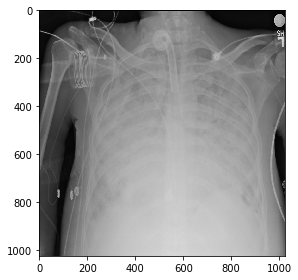

In [ ]:
from skimage import io
io.imshow(dataset[150])

In [ ]:
trainX = dataset
testX = test_dataset

Train: X=(500, 1024, 1024, 3), y=(500,)


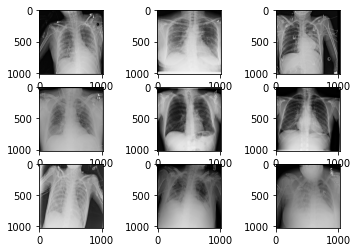

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
# print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
folder = "../input/regression_sample"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

numpy.ndarray

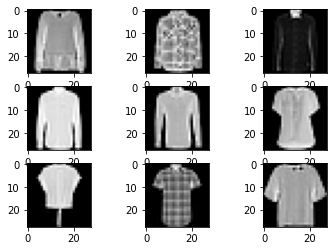

In [ ]:
two = trainX[trainy==6]
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(two[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
mask = [any(tup) for tup in zip(trainy==2, trainy==6, trainy==8)]

In [ ]:
trainX =  trainX[mask]
trainy = trainy[mask]

In [ ]:
test_mask = [any(tup) for tup in zip(testy==2, testy==6, testy==8)]
testX =  testX[test_mask]
testy = testy[test_mask]

In [ ]:
data_aug_set = trainX[mask]
labels_aug_set = trainy[mask]

In [ ]:
size = int(data_aug_set.shape[0]/3)
gauss_noise = data_aug_set[0: size].copy()
crop = data_aug_set[size: 2*size].copy()
translate = data_aug_set[2* size: ].copy()

In [ ]:
# Data Augmentation Step:, crop, translation, gaussian noise

# GAUSSIAN NOISE
import cv2
import numpy as np
from skimage.util import random_noise
# Add gaussian noise to the image
gauss_noise_final = random_noise(gauss_noise, mode='gaussian')


# CROPPING
import imgaug.augmenters as iaa

crop_amount = 0.2* np.random.random_sample((size,))
crop_final = np.zeros(crop.shape)
for i in range(crop.shape[0]):
  img = crop[i]
  aug = iaa.Crop(percent=crop_amount[i])
  crop_final[i] = aug(images=img)

# TRANSLATE
trans_amount_1 = 0.1* np.random.random_sample((size,))
trans_amount_2 = 0.1* np.random.random_sample((size,))
trans_amount_3 = 0.1* np.random.random_sample((size,))
trans_amount_4 = 0.1* np.random.random_sample((size,))

translate_final = np.zeros(translate.shape)
for i in range(translate.shape[0]):
  img = translate[i]
  aug = iaa.TranslateX(percent=(trans_amount_1[i], trans_amount_2[i]))
  img = aug(images=img)
  aug = iaa.TranslateY(percent=(trans_amount_3[i], trans_amount_4[i]))
  translate_final[i] = aug(images=img)

NameError: ignored

In [ ]:
data_aug_set = np.concatenate((gauss_noise_final, crop_final, translate_final), axis=0)

In [ ]:
trainX = np.concatenate((trainX, data_aug_set), axis=0)
trainy = np.concatenate((trainy, labels_aug_set), axis=0)

In [ ]:
trainX = trainX.reshape(trainX.shape[0], 784)
testX = testX.reshape(testX.shape[0], 784)
x_train, y_train, x_test, y_test = trainX, trainy, testX, testy

In [ ]:
'''# UNCOMMENT FOR FASHION MNIST DATA
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)'''

'# UNCOMMENT FOR FASHION MNIST DATA\nfrom keras.datasets import fashion_mnist\n# load dataset\n(trainX, trainy), (testX, testy) = fashion_mnist.load_data()\n\ntrainX = trainX.reshape(60000, 784)\ntestX = testX.reshape(10000, 784)'

In [ ]:
'''from sklearn import datasets

(trainX, trainy), (testX, testy) = mnist.load_data()
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)

x_train=trainX[0:2000]
x_test=testX[0:1000]
y_train=trainy[0:2000]
y_test=testy[0:1000]
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])'''

'from sklearn import datasets\n\n(trainX, trainy), (testX, testy) = mnist.load_data()\ntrainX = trainX.reshape(60000, 784)\ntestX = testX.reshape(10000, 784)\n\nx_train=trainX[0:2000]\nx_test=testX[0:1000]\ny_train=trainy[0:2000]\ny_test=testy[0:1000]\nprint("%d training samples" % x_train.shape[0])\nprint("%d test samples" % x_test.shape[0])'

In [ ]:
from os.path import abspath, dirname, join

import numpy as np
import scipy.sparse as sp

def calculate_cpm(x, axis=1):
    """Calculate counts-per-million on data where the rows are genes.
    Parameters
    ----------
    x : array_like
    axis : int
        Axis accross which to compute CPM. 0 for genes being in rows and 1 for
        genes in columns.
    """
    normalization = np.sum(x, axis=axis)
    # On sparse matrices, the sum will be 2d. We want a 1d array
    normalization = np.squeeze(np.asarray(normalization))
    # Straight up division is not an option since this will form a full dense
    # matrix if `x` is sparse. Divison can be expressed as the dot product with
    # a reciprocal diagonal matrix
    normalization = sp.diags(1 / normalization, offsets=0)
    if axis == 0:
        cpm_counts = np.dot(x, normalization)
    elif axis == 1:
        cpm_counts = np.dot(normalization, x)
    return cpm_counts * 1e6


def log_normalize(data):
    """Perform log transform log(x + 1).
    Parameters
    ----------
    data : array_like
    """
    if sp.issparse(data):
        data = data.copy()
        data.data = np.log2(data.data + 1)
        return data

    return np.log2(data.astype(np.float64) + 1)


def pca(x, n_components=50):
    if sp.issparse(x):
        x = x.toarray()
    U, S, V = np.linalg.svd(x, full_matrices=False)
    U[:, np.sum(V, axis=1) < 0] *= -1
    x_reduced = np.dot(U, np.diag(S))
    x_reduced = x_reduced[:, np.argsort(S)[::-1]][:, :n_components]
    return x_reduced


def select_genes(
    data,
    threshold=0,
    atleast=10,
    yoffset=0.02,
    xoffset=5,
    decay=1,
    n=None,
    plot=True,
    markers=None,
    genes=None,
    figsize=(6, 3.5),
    markeroffsets=None,
    labelsize=10,
    alpha=1,
):
    if sp.issparse(data):
        zeroRate = 1 - np.squeeze(np.array((data > threshold).mean(axis=0)))
        A = data.multiply(data > threshold)
        A.data = np.log2(A.data)
        meanExpr = np.zeros_like(zeroRate) * np.nan
        detected = zeroRate < 1
        meanExpr[detected] = np.squeeze(np.array(A[:, detected].mean(axis=0))) / (
            1 - zeroRate[detected]
        )
    else:
        zeroRate = 1 - np.mean(data > threshold, axis=0)
        meanExpr = np.zeros_like(zeroRate) * np.nan
        detected = zeroRate < 1
        meanExpr[detected] = np.nanmean(
            np.where(data[:, detected] > threshold, np.log2(data[:, detected]), np.nan),
            axis=0,
        )

    lowDetection = np.array(np.sum(data > threshold, axis=0)).squeeze() < atleast
    # lowDetection = (1 - zeroRate) * data.shape[0] < atleast - .00001
    zeroRate[lowDetection] = np.nan
    meanExpr[lowDetection] = np.nan

    if n is not None:
        up = 10
        low = 0
        for t in range(100):
            nonan = ~np.isnan(zeroRate)
            selected = np.zeros_like(zeroRate).astype(bool)
            selected[nonan] = (
                zeroRate[nonan] > np.exp(-decay * (meanExpr[nonan] - xoffset)) + yoffset
            )
            if np.sum(selected) == n:
                break
            elif np.sum(selected) < n:
                up = xoffset
                xoffset = (xoffset + low) / 2
            else:
                low = xoffset
                xoffset = (xoffset + up) / 2
        print("Chosen offset: {:.2f}".format(xoffset))
    else:
        nonan = ~np.isnan(zeroRate)
        selected = np.zeros_like(zeroRate).astype(bool)
        selected[nonan] = (
            zeroRate[nonan] > np.exp(-decay * (meanExpr[nonan] - xoffset)) + yoffset
        )

    if plot:
        import matplotlib.pyplot as plt

        if figsize is not None:
            plt.figure(figsize=figsize)
        plt.ylim([0, 1])
        if threshold > 0:
            plt.xlim([np.log2(threshold), np.ceil(np.nanmax(meanExpr))])
        else:
            plt.xlim([0, np.ceil(np.nanmax(meanExpr))])
        x = np.arange(plt.xlim()[0], plt.xlim()[1] + 0.1, 0.1)
        y = np.exp(-decay * (x - xoffset)) + yoffset
        if decay == 1:
            plt.text(
                0.4,
                0.2,
                "{} genes selected\ny = exp(-x+{:.2f})+{:.2f}".format(
                    np.sum(selected), xoffset, yoffset
                ),
                color="k",
                fontsize=labelsize,
                transform=plt.gca().transAxes,
            )
        else:
            plt.text(
                0.4,
                0.2,
                "{} genes selected\ny = exp(-{:.1f}*(x-{:.2f}))+{:.2f}".format(
                    np.sum(selected), decay, xoffset, yoffset
                ),
                color="k",
                fontsize=labelsize,
                transform=plt.gca().transAxes,
            )

        plt.plot(x, y, linewidth=2)
        xy = np.concatenate(
            (
                np.concatenate((x[:, None], y[:, None]), axis=1),
                np.array([[plt.xlim()[1], 1]]),
            )
        )
        t = plt.matplotlib.patches.Polygon(xy, color="r", alpha=0.2)
        plt.gca().add_patch(t)

        plt.scatter(meanExpr, zeroRate, s=3, alpha=alpha, rasterized=True)
        if threshold == 0:
            plt.xlabel("Mean log2 nonzero expression")
            plt.ylabel("Frequency of zero expression")
        else:
            plt.xlabel("Mean log2 nonzero expression")
            plt.ylabel("Frequency of near-zero expression")
        plt.tight_layout()

        if markers is not None and genes is not None:
            if markeroffsets is None:
                markeroffsets = [(0, 0) for g in markers]
            for num, g in enumerate(markers):
                i = np.where(genes == g)[0]
                plt.scatter(meanExpr[i], zeroRate[i], s=10, color="k")
                dx, dy = markeroffsets[num]
                plt.text(
                    meanExpr[i] + dx + 0.1,
                    zeroRate[i] + dy,
                    g,
                    color="k",
                    fontsize=labelsize,
                )

    return selected


def plot(
    x,
    y,
    ax=None,
    title=None,
    draw_legend=True,
    draw_centers=False,
    draw_cluster_labels=False,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(map(colors.get, y))

    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    # Plot mediods
    if draw_centers:
        centers = []
        for yi in classes:
            mask = yi == y
            centers.append(np.median(x[mask, :2], axis=0))
        centers = np.array(centers)

        center_colors = list(map(colors.get, classes))
        ax.scatter(
            centers[:, 0], centers[:, 1], c=center_colors, s=48, alpha=1, edgecolor="k"
        )

        # Draw mediod labels
        if draw_cluster_labels:
            for idx, label in enumerate(classes):
                ax.text(
                    centers[idx, 0],
                    centers[idx, 1] + 2.2,
                    label,
                    fontsize=kwargs.get("fontsize", 6),
                    horizontalalignment="center",
                )

    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)


def evaluate_embedding(
    embedding, labels, projection_embedding=None, projection_labels=None, sample=None
):
    """Evaluate the embedding using Moran's I index.
    Parameters
    ----------
    embedding: np.ndarray
        The data embedding.
    labels: np.ndarray
        A 1d numpy array containing the labels of each point.
    projection_embedding: Optional[np.ndarray]
        If this is given, the score will relate to how well the projection fits
        the embedding.
    projection_labels: Optional[np.ndarray]
        A 1d numpy array containing the labels of each projection point.
    sample: Optional[int]
        If this is specified, the score will be computed on a sample of points.
    Returns
    -------
    float
        Moran's I index.
    """
    has_projection = projection_embedding is not None
    if projection_embedding is None:
        projection_embedding = embedding
        if projection_labels is not None:
            raise ValueError(
                "If `projection_embedding` is None then `projection_labels make no sense`"
            )
        projection_labels = labels

    if embedding.shape[0] != labels.shape[0]:
        raise ValueError("The shape of the embedding and labels don't match")

    if projection_embedding.shape[0] != projection_labels.shape[0]:
        raise ValueError("The shape of the reference embedding and labels don't match")

    if sample is not None:
        n_samples = embedding.shape[0]
        sample_indices = np.random.choice(
            n_samples, size=min(sample, n_samples), replace=False
        )
        embedding = embedding[sample_indices]
        labels = labels[sample_indices]

        n_samples = projection_embedding.shape[0]
        sample_indices = np.random.choice(
            n_samples, size=min(sample, n_samples), replace=False
        )
        projection_embedding = projection_embedding[sample_indices]
        projection_labels = projection_labels[sample_indices]

    weights = projection_labels[:, None] == labels
    if not has_projection:
        np.fill_diagonal(weights, 0)

    mu = np.asarray(embedding.mean(axis=0)).ravel()

    numerator = np.sum(weights * ((projection_embedding - mu) @ (embedding - mu).T))
    denominator = np.sum((projection_embedding - mu) ** 2)

    return projection_embedding.shape[0] / np.sum(weights) * numerator / denominator

In [ ]:
'''MNIST_COLORS = {
    0: "#A5C93D",
    1: "#8B006B",
    2: "#2000D7",
    3: "#538CBA",
    4: "#8B006B",
    5: "#B33B19",
    6: "#ffcb9a",
    7: "#C38A1F",
    8: "#538CBA",
    9: "#3d672d"}
'''

from pylab import *

cmap = cm.get_cmap('Spectral', 10)    # PiYG
MNIST_COLORS = {}

for i in range(cmap.N):
    rgb = cmap(0)[:3] # will return rgba, we take only first 3 so we get rgb
    MNIST_COLORS[i] = str(matplotlib.colors.rgb2hex(rgb))

In [ ]:
perp = 30
n_iter = 1000
tsne = TSNE(
    perplexity=perp,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
    n_iter=n_iter,
)

/usr/local/lib/python3.6/dist-packages/openTSNE/callbacks.py:55: FutureWarning: `ErrorLogger` will be removed in upcoming version. Please use the `verbose` flag instead.
  category=FutureWarning,


In [ ]:

(x_train, y_train, x_test, y_test)= (trainX, trainy, testX, testy)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 3145728)
x_test= x_test.reshape(x_test.shape[0], 3145728)

In [ ]:
# construct tsne embedding object
embedding_train = tsne.fit(x_train)

In [ ]:
import pandas as pd


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

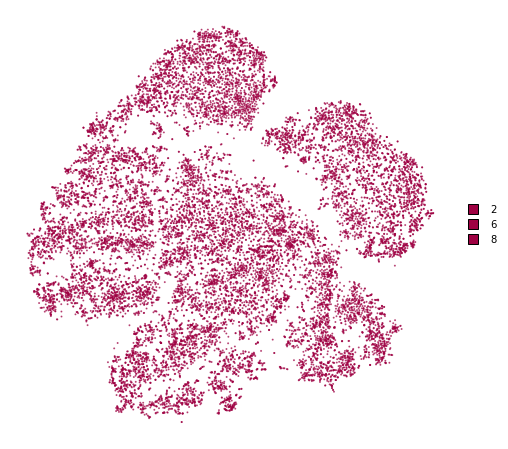

In [ ]:
plot(embedding_train, y_train, colors=MNIST_COLORS)

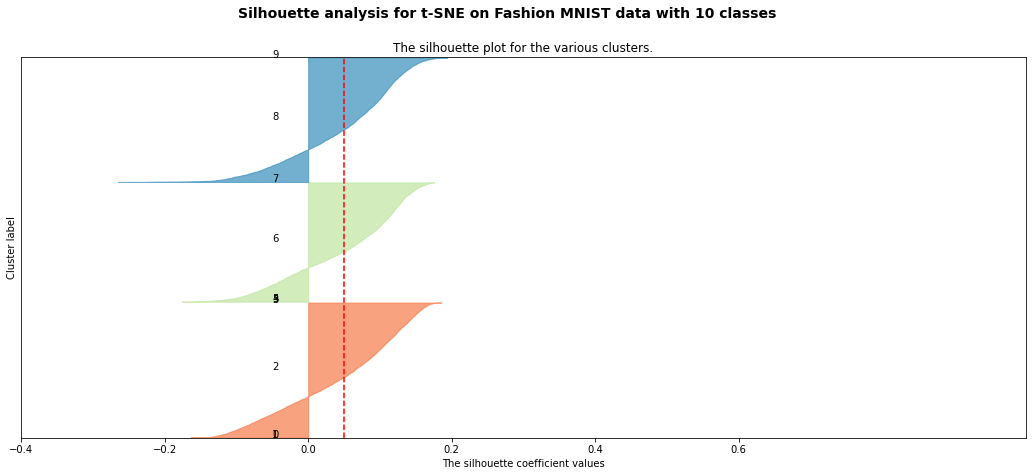

In [ ]:
n_clusters = 10
X = x_train
# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
from sklearn.neighbors import KNeighborsClassifier
neighs = KNeighborsClassifier(n_neighbors=10)
neighs.fit(embedding_train, y_train)
cluster_labels = neighs.predict(embedding_train)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
from sklearn.metrics.cluster import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
'''print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)'''

# Compute the silhouette scores for each sample
from sklearn.metrics.cluster import silhouette_samples
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = MNIST_COLORS[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6])

plt.suptitle(("Silhouette analysis for t-SNE on Fashion MNIST data "
              "with %d classes" % n_clusters),
              fontsize=14, fontweight='bold')


plt.show()

In [ ]:
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    print(str(i) +"'s avg ss: "+ str(ith_cluster_silhouette_values.mean()))

0's avg ss: nan
1's avg ss: nan
2's avg ss: 0.04718750859513014
3's avg ss: nan
4's avg ss: nan
5's avg ss: nan
6's avg ss: 0.05120953683058548
7's avg ss: nan
8's avg ss: 0.05009114398193454
9's avg ss: nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
silhouette_avg

0.04941030272798155

In [ ]:
# Transform. Embed new points into an existing embedding PART 1 (un normalized)
%time embedding_test_2 = embedding_train.transform(x_test_2)


NameError: ignored

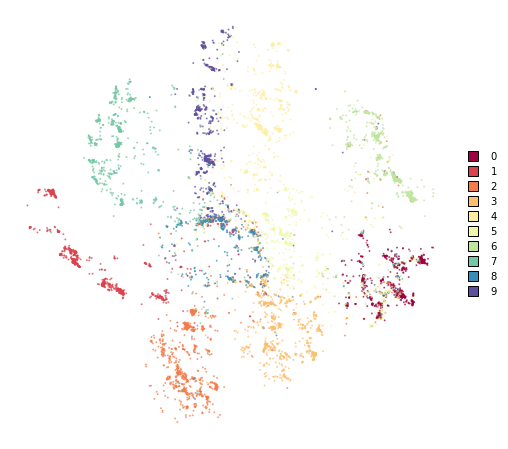

In [ ]:
plot(embedding_test_2, y_test, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_2, y_test)
acc_knn

NameError: ignored

Iteration   50, KL divergence  53072.8279, 50 iterations in 0.1580 sec
Iteration  100, KL divergence  53103.1809, 50 iterations in 0.1492 sec
Iteration  150, KL divergence  53125.4145, 50 iterations in 0.1675 sec
Iteration  200, KL divergence  53141.0219, 50 iterations in 0.1455 sec
Iteration  250, KL divergence  53154.9553, 50 iterations in 0.1517 sec
CPU times: user 7.15 s, sys: 133 ms, total: 7.28 s
Wall time: 4.46 s


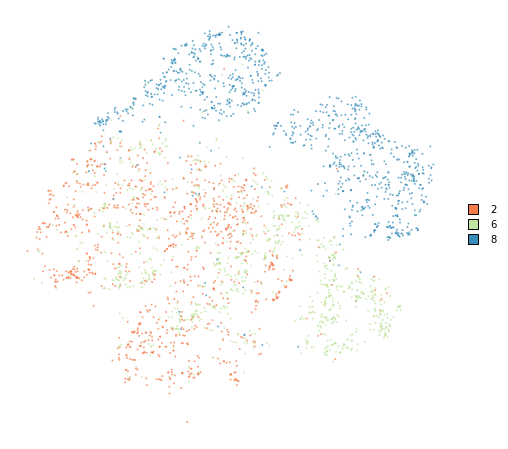

In [ ]:
# Transform. Embed new points into an existing embedding PART 1 (un normalized)
%time embedding_test = embedding_train.transform(x_test)
plot(embedding_test, y_test, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

0.8453333333333334

1-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_2, y_test)
acc_knn

In [ ]:
# Transform. Embed new points into an existing embedding PART 1 (un normalized)
%time embedding_test = embedding_train.transform(x_test)

In [ ]:
plot(embedding_test, y_test, colors=MNIST_COLORS)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

In [ ]:
x_test_2 = x_test
x_test = x_test / 255

In [ ]:
# Transform. Embed new points into an existing embedding PART 2 (normalized)
%time embedding_test = embedding_train.transform(x_test)
plot(embedding_test, y_test, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_2, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_2, y_test)
acc_knn

David-Boudin Score

In [ ]:
from sklearn.metrics.cluster import davies_bouldin_score as dbs
dbs(embedding_train, y_train)

2.019369238789748

Silhouette Score

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(embedding_train, y_train)

0.17950238949128514

In [ ]:
from sklearn.metrics.cluster import silhouette_samples
ss = silhouette_samples(embedding_train, y_train)

Open TSNE: Advanced Usage

In [ ]:
from openTSNE import TSNEEmbedding
from openTSNE.affinity import PerplexityBasedNN
from openTSNE import initialization
from openTSNE.callbacks import ErrorLogger

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# compute affinities between data points
%%time
affinities_train = PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
)

CPU times: user 4min 12s, sys: 2.31 s, total: 4min 15s
Wall time: 2min 28s


In [ ]:
%time init_train = initialization.pca(x_train, random_state=42)

CPU times: user 4.11 s, sys: 422 ms, total: 4.53 s
Wall time: 2.48 s


In [ ]:
init_train.shape

(60000, 2)

In [ ]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    callbacks=ErrorLogger(),
)

/usr/local/lib/python3.6/dist-packages/openTSNE/callbacks.py:55: FutureWarning: `ErrorLogger` will be removed in upcoming version. Please use the `verbose` flag instead.
  category=FutureWarning,


Early Exagerration

Iteration   50, KL divergence  6.1131, 50 iterations in 7.1343 sec
Iteration  100, KL divergence  5.5965, 50 iterations in 7.1281 sec
Iteration  150, KL divergence  5.4654, 50 iterations in 7.1540 sec
Iteration  200, KL divergence  5.4035, 50 iterations in 7.1570 sec
Iteration  250, KL divergence  5.3686, 50 iterations in 7.1548 sec
CPU times: user 1min 3s, sys: 293 ms, total: 1min 3s
Wall time: 36.1 s


In [ ]:
%time embedding_train_12 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)
# plot(embedding_train_12, y_train, colors=MNIST_COLORS) 

Iteration   50, KL divergence  6.1131, 50 iterations in 8.6003 sec
Iteration  100, KL divergence  5.5965, 50 iterations in 8.5870 sec
Iteration  150, KL divergence  5.4654, 50 iterations in 8.5450 sec
Iteration  200, KL divergence  5.4035, 50 iterations in 8.5784 sec
Iteration  250, KL divergence  5.3686, 50 iterations in 8.5722 sec
CPU times: user 1min 15s, sys: 208 ms, total: 1min 15s
Wall time: 43.3 s


CPU times: user 20.2 s, sys: 296 ms, total: 20.5 s
Wall time: 10.8 s


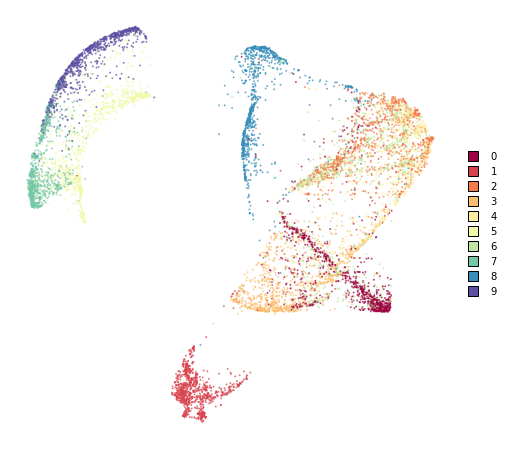

In [ ]:
%%time
embedding_test_ee = embedding_train_12.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)
plot(embedding_test_ee, y_test, colors=MNIST_COLORS)


Iteration   50, KL divergence  196201.0477, 50 iterations in 0.3537 sec
Iteration  100, KL divergence  197898.9025, 50 iterations in 0.3759 sec
Iteration  150, KL divergence  198775.7085, 50 iterations in 0.3677 sec
Iteration  200, KL divergence  199434.5164, 50 iterations in 0.3715 sec
Iteration  250, KL divergence  199777.4592, 50 iterations in 0.3646 sec


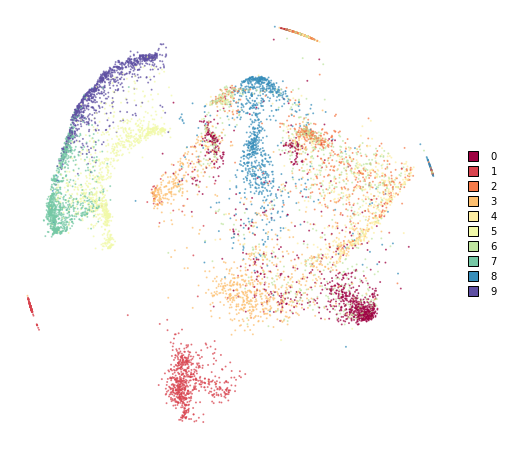

In [ ]:
embedding_test_12 = embedding_train_12.transform(x_test)
plot(embedding_test_12, y_test, colors=MNIST_COLORS)


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_12, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_ee, y_test)
acc_knn

0.554

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_12, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_ee, y_test)
acc_knn

0.5809

In [ ]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)
plot(embedding_train_1, y_train, colors=MNIST_COLORS)


Iteration   50, KL divergence  96.4527, 50 iterations in 12.4479 sec
Iteration  100, KL divergence  97.3684, 50 iterations in 69.8782 sec


KeyboardInterrupt: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_1, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

NameError: ignored

Iteration   50, KL divergence  4.0112, 50 iterations in 8.7690 sec
Iteration  100, KL divergence  3.4841, 50 iterations in 8.7795 sec
Iteration  150, KL divergence  3.2101, 50 iterations in 9.5121 sec
Iteration  200, KL divergence  3.0370, 50 iterations in 10.7310 sec
Iteration  250, KL divergence  2.9168, 50 iterations in 11.8749 sec
Iteration  300, KL divergence  2.8289, 50 iterations in 13.7595 sec
Iteration  350, KL divergence  2.7619, 50 iterations in 15.6869 sec
Iteration  400, KL divergence  2.7095, 50 iterations in 17.3418 sec
Iteration  450, KL divergence  2.6673, 50 iterations in 20.1590 sec
Iteration  500, KL divergence  2.6324, 50 iterations in 22.8414 sec
Iteration  550, KL divergence  2.6024, 50 iterations in 23.0911 sec
Iteration  600, KL divergence  2.5780, 50 iterations in 26.2887 sec
Iteration  650, KL divergence  2.5565, 50 iterations in 26.0581 sec
Iteration  700, KL divergence  2.5380, 50 iterations in 32.5523 sec
Iteration  750, KL divergence  2.5282, 50 iteration

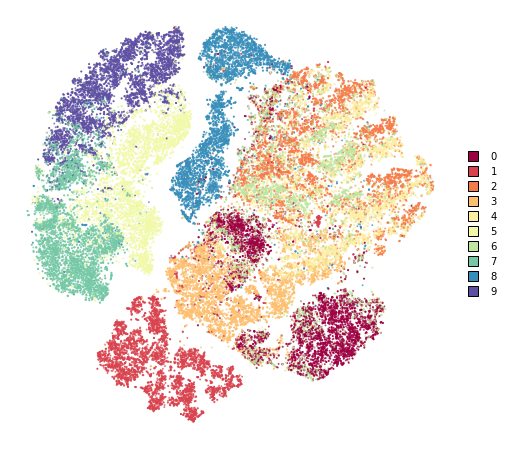

In [ ]:
%time embedding_train_1 = embedding_train_12.optimize(n_iter=750, momentum=0.8)
plot(embedding_train_1, y_train, colors=MNIST_COLORS)


CPU times: user 19.9 s, sys: 308 ms, total: 20.2 s
Wall time: 10.7 s


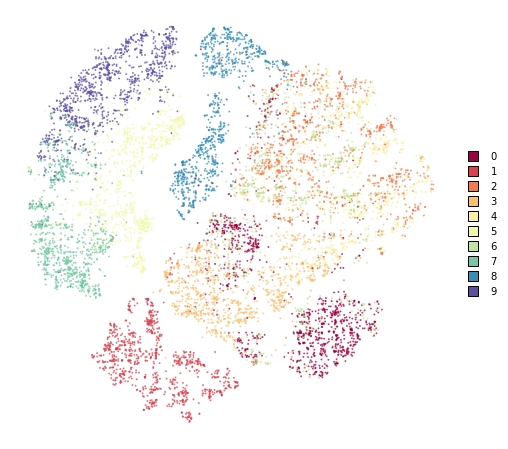

In [ ]:
%%time
embedding_test_opt = embedding_train_1.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)
plot(embedding_test_opt, y_test, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_1, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_1, y_test)
acc_knn

0.8227

In [ ]:

%time embedding_test_1 = embedding_test_opt.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)


Iteration   50, KL divergence  134252.3377, 50 iterations in 0.9792 sec
Iteration  100, KL divergence  131817.7225, 50 iterations in 0.2940 sec
Iteration  150, KL divergence  131507.0429, 50 iterations in 0.3031 sec
Iteration  200, KL divergence  131357.0363, 50 iterations in 0.2985 sec
Iteration  250, KL divergence  131297.9574, 50 iterations in 0.3088 sec
CPU times: user 2.74 s, sys: 41.9 ms, total: 2.78 s
Wall time: 2.2 s


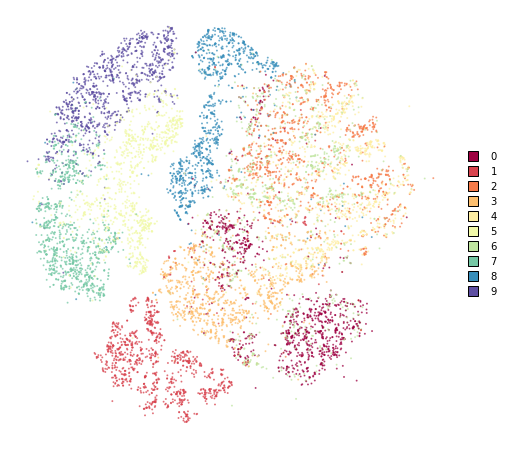

In [ ]:
plot(embedding_test_1, y_test, colors=MNIST_COLORS)

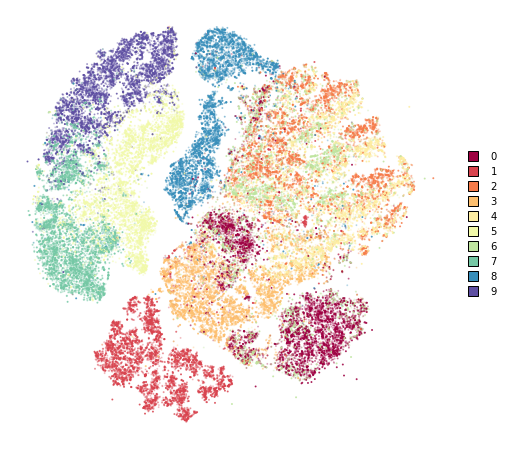

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plot(embedding_train_1, y_train, colors=MNIST_COLORS, alpha=0.25, ax=ax)
plot(embedding_test_1, y_test, colors=MNIST_COLORS, alpha=0.75, ax=ax)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_1, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_opt, y_test)
acc_knn

0.7479

In [ ]:
%time embedding_test_1 = embedding_test_opt.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

Iteration   50, KL divergence  164789.9679, 50 iterations in 0.2875 sec
Iteration  100, KL divergence  162028.5855, 50 iterations in 0.2799 sec
Iteration  150, KL divergence  165237.5410, 50 iterations in 0.2833 sec
Iteration  200, KL divergence  164374.7419, 50 iterations in 0.2848 sec
Iteration  250, KL divergence  168946.6418, 50 iterations in 0.2849 sec
CPU times: user 2 s, sys: 51 ms, total: 2.05 s
Wall time: 1.43 s


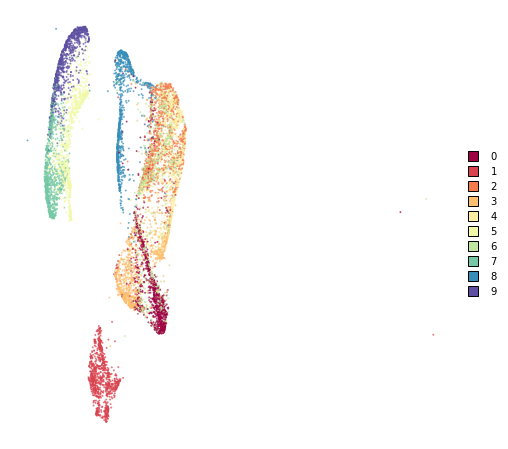

In [ ]:
plot(embedding_test_1, y_test, colors=MNIST_COLORS)

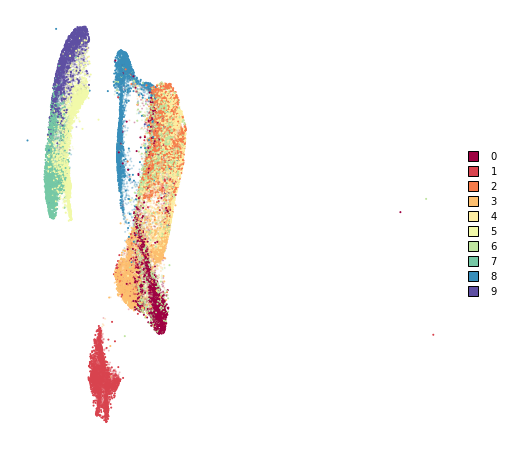

In [ ]:
# super imposed, transformed points have larger opacity
fig, ax = plt.subplots(figsize=(8, 8))
plot(embedding_train_1, y_train, colors=MNIST_COLORS, alpha=0.25, ax=ax)
plot(embedding_test_1, y_test, colors=MNIST_COLORS, alpha=1, ax=ax)

In [ ]:
# OPTIMIZED
%time embedding_train_2 = embedding_train_12.optimize(n_iter=750, momentum=0.8)

In [ ]:
plot(embedding_train_2, y_train, colors=MNIST_COLORS)


In [ ]:
%%time
embedding_test_opt = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)
plot(embedding_test_opt, y_test, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_2, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_opt, y_test)
acc_knn

In [ ]:
# Transform
%%time
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

CPU times: user 19.6 s, sys: 289 ms, total: 19.9 s
Wall time: 10.6 s


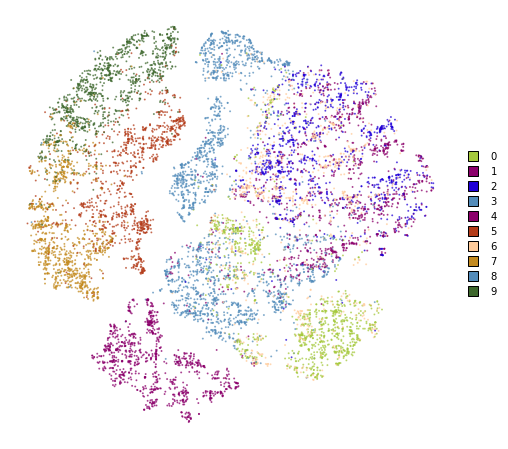

In [ ]:
plot(embedding_test, y_test, colors=MNIST_COLORS)


In [ ]:
# optimized transform
%time embedding_test_1 = embedding_test.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

Iteration   50, KL divergence  133880.0116, 50 iterations in 0.8342 sec
Iteration  100, KL divergence  131833.7294, 50 iterations in 0.2868 sec
Iteration  150, KL divergence  131537.1643, 50 iterations in 0.2870 sec
Iteration  200, KL divergence  131414.1107, 50 iterations in 0.2846 sec
Iteration  250, KL divergence  131346.1297, 50 iterations in 0.2762 sec
CPU times: user 2.54 s, sys: 30.2 ms, total: 2.57 s
Wall time: 1.98 s


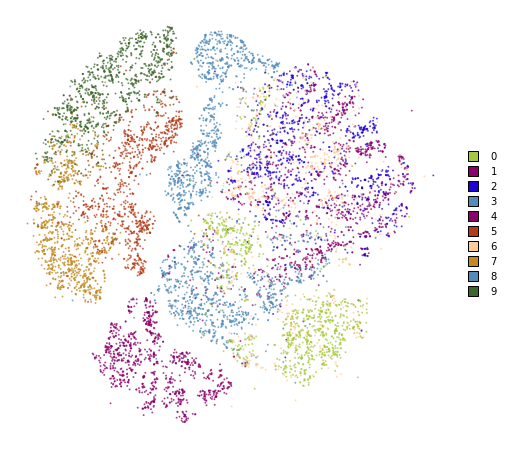

In [ ]:
plot(embedding_test_1, y_test, colors=MNIST_COLORS)

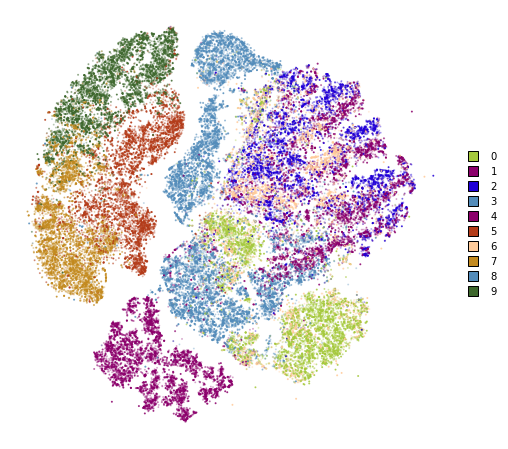

In [ ]:
# test and train super imposed
fig, ax = plt.subplots(figsize=(8, 8))
plot(embedding_train_2, y_train, colors=MNIST_COLORS, alpha=0.25, ax=ax)
plot(embedding_test_1, y_test, colors=MNIST_COLORS, alpha=0.75, ax=ax)

In [ ]:
# construct tsne embedding object
embedding_train = tsne.fit(x_train)

KeyboardInterrupt: ignored

In [ ]:
plot(embedding_train, pd.DataFrame(y_train)[0], colors=MNIST_COLORS)

In [ ]:
# Transform. Embed new points into an existing embedding
%time embedding_test = embedding_train.transform(x_test)

In [ ]:
plot(embedding_test, y_test, colors=MNIST_COLORS)


UMAP

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data[:1000]
y = digits.target[:1000]

In [ ]:
X.shape

(1000, 64)

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
(trainX, trainy), (testX, testy)

In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
trainX = trainX.reshape(60000,784)
testX = testX.reshape(10000,784)

In [ ]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(trainX)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [ ]:
# look at the reducer object that has been trained on mnist dataset
# call transform to look at the embedding object
embedding = reducer.transform(trainX)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(60000, 2)

In [ ]:
trainy.shape

(60000,)

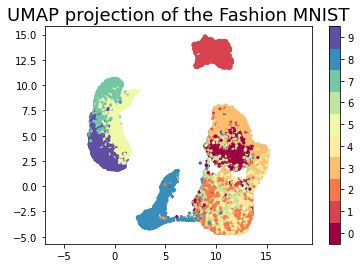

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=trainy, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Fashion MNIST', fontsize=18);